In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv("placement.csv")

In [100]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [101]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

C:\Users\solan\AppData\Local\Temp\ipykernel_17852\2323667551.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\solan\AppData\Local\Temp\ipykernel_17852\2323667551.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


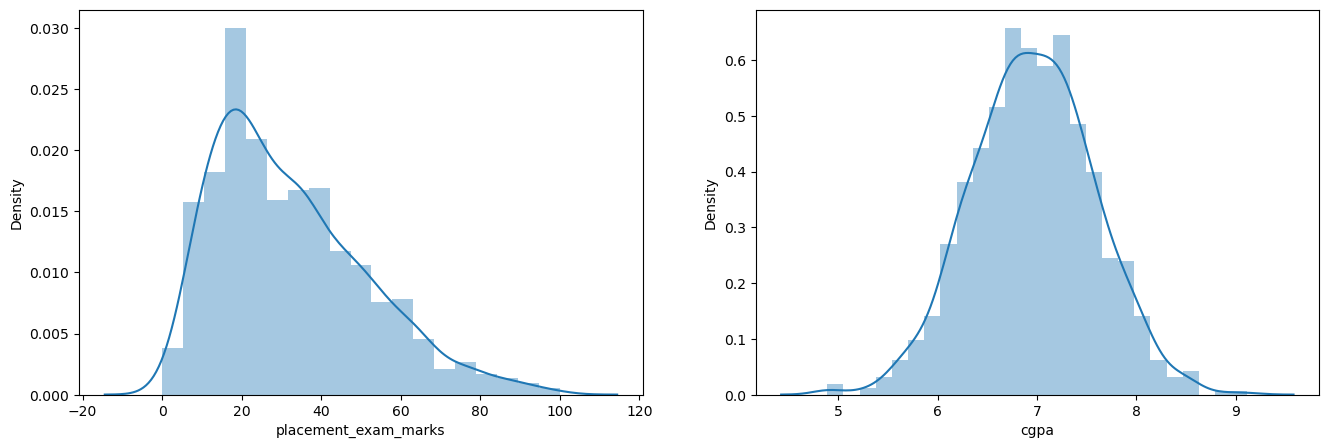

In [104]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(1,2,2)
sns.distplot(df['cgpa'])
plt.show()

<Axes: >

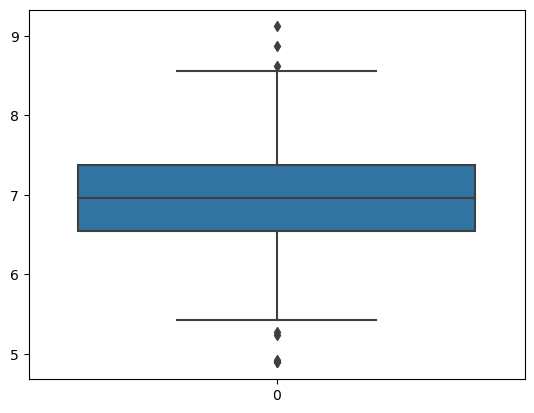

In [105]:
# box plot is used for detecting outlier are present in our dataset or not.
sns.boxplot(df['cgpa'])

In [106]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [107]:
# finding BOundary value
print("highest_allowed :", df['cgpa'].mean() + 3* df['cgpa'].std())
print("lowest_allowed :" , df['cgpa'].mean() - 3* df['cgpa'].std())

highest_allowed : 8.808933625397168
lowest_allowed : 5.113546374602832


In [108]:
df[(df['cgpa'] > 8.808933625397168 ) | (df['cgpa'] < 5.113546374602832 )]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [109]:
df.shape

(1000, 3)

In [110]:
# TRIMMING  method 1
df_new =df[(df['cgpa'] < 8.808933625397168 ) & (df['cgpa'] > 5.113546374602832 )]

In [111]:
df_new

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [112]:
df_new.shape

(995, 3)

<Axes: >

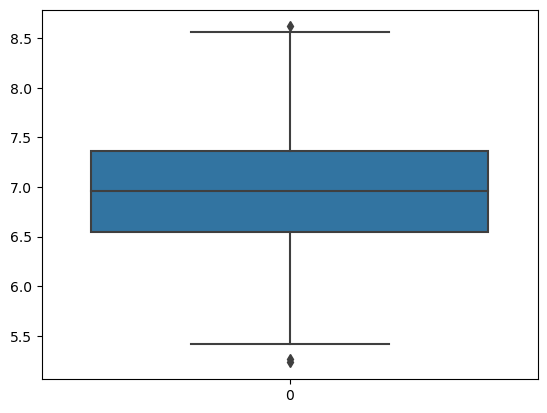

In [113]:
sns.boxplot(df_new['cgpa'])

In [114]:
## aproch 2 
# calculate  z score
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [115]:
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [116]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [117]:
df[df['cgpa_zscore'] < -3 ]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [118]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3 )]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [119]:
df_n = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3 )]

<Axes: >

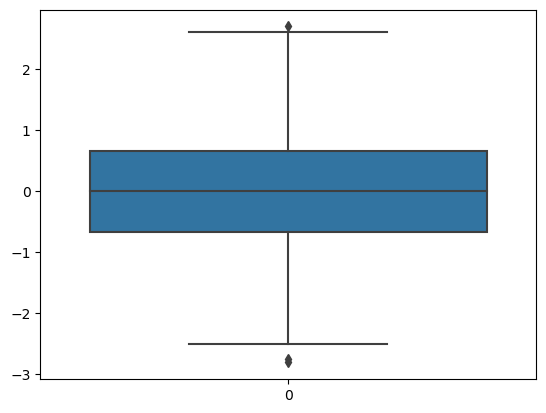

In [120]:
sns.boxplot(df_n['cgpa_zscore'])

In [121]:
# capping method --> it doesnt drop outlier instead of it update the outlier values into under the range of upper and lower 

In [122]:
upper_limit = df['cgpa'].mean() + 3* df['cgpa'].std()
lower_limit =  df['cgpa'].mean() - 3* df['cgpa'].std()

In [123]:
lower_limit

5.113546374602832

In [124]:
upper_limit

8.808933625397168

In [125]:
df['cgpa'] =np.where(
df['cgpa'] > upper_limit, 
upper_limit,
np.where(df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
        )
)

In [126]:
df.shape

(1000, 4)

In [127]:
# inter quartile range method


In [128]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [129]:
Q1 = df['cgpa'].quantile(0.25)
Q3 = df['cgpa'].quantile(0.75)


In [130]:
IQR = Q3- Q1

In [131]:
IQR

0.8200000000000003

In [132]:
upper_l = Q3 + 1.5 * IQR
lower_l = Q1 - 1.5 * IQR

In [133]:
lower_l

5.319999999999999

In [134]:
upper_l

8.600000000000001

In [135]:
# finding outlier

In [136]:
df[df['cgpa'] > upper_l]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
998,8.620000,46.0,1,2.693239


In [137]:
df[df['cgpa'] < lower_l]

,cgpa,placement_exam_marks,placed,cgpa_zscore
278,5.230000,17.0,1,-2.810921
485,5.113546,44.0,1,-3.314251
815,5.270000,43.0,0,-2.745975
997,5.113546,34.0,0,-3.362960
999,5.113546,10.0,1,-3.346724


In [138]:
# trimming   ---> IQR method

In [139]:
parth = df[(df['cgpa'] <= upper_l ) & (df['cgpa'] >= lower_l)]

<Axes: >

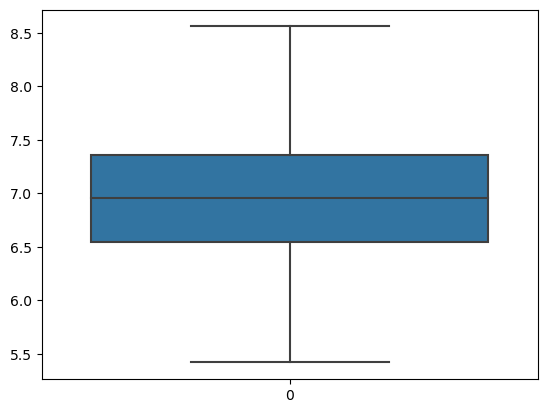

In [140]:
sns.boxplot(parth['cgpa']) 

In [141]:
# capping  --> IQR 
parth_df = df.copy()


In [142]:
parth_df['cgpa'] = np.where(
parth_df['cgpa'] > upper_l,
upper_l,
np.where(parth_df['cgpa'] < lower_l,lower_l,
        parth_df['cgpa']))

C:\Users\solan\AppData\Local\Temp\ipykernel_17852\3953352869.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\solan\AppData\Local\Temp\ipykernel_17852\3953352869.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(parth_df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

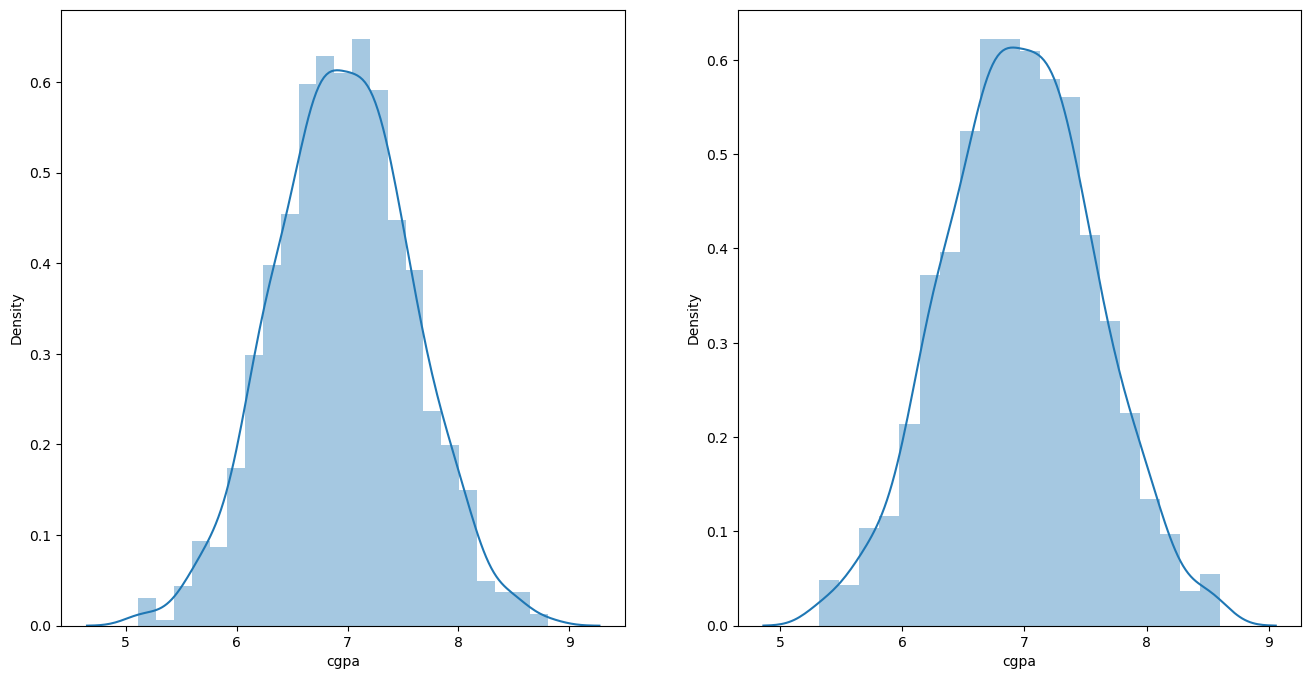

In [144]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(parth_df['cgpa'])

<Axes: >

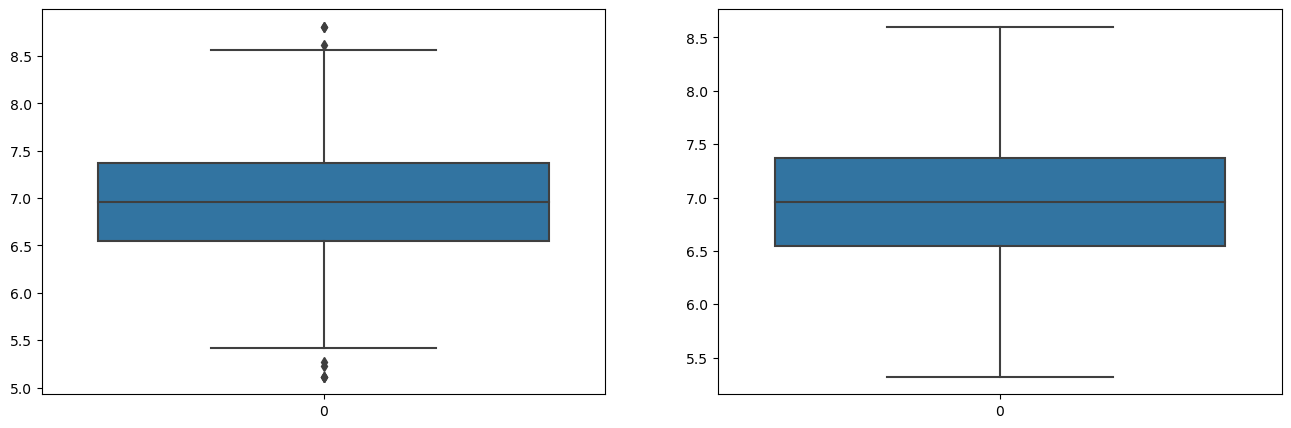

In [145]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['cgpa'])
plt.subplot(1,2,2)
sns.boxplot(parth_df['cgpa'])